# Custom Model 5
## Import library

In [24]:
import os
import time
import platform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import chain
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications.vgg16 
import tensorflow.keras.applications.vgg19
import tensorflow.keras.applications.resnet50
import tensorflow.keras.applications.xception
import tensorflow.keras.applications.inception_v3
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras import initializers, Model
from tensorflow.keras import regularizers

## Function definitions

In [25]:
def build_fileDatabases(data_dir):
    os.chdir(data_dir)
    fileDatabases = []
    classNames = []

    for dirpath,dirnames ,filenames in os.walk(data_dir):        
        if filenames:     
            if platform.system() == "Linux":
                path = dirpath.split('/')
            else:
                path = dirpath.split('\\')
        else:
            continue
    
        if path[-3][0] == '#': #Nazwy folderów poprzedzone znakime # nie będą zawarte w bazie danych
            #print('contains #')
            continue
    
        for i in range(len(path)):
            if path[i] == 'Left':# or path[i] == 'Right':
                className = path[i-2]
                classNames.append(className)
    
                filenames_images = []
    
                for i in range(len(filenames)):
                    if filenames[i][-3:] == 'jpg':              
                        filenames_images.append(os.path.join(dirpath,filenames[i]))
    
                fileDatabases.append(filenames_images) 

    classNumber = len(set(classNames))
    classDict = dict(zip(set(classNames),range(classNumber)))
    print('Słownik obiektów: \n',classDict)
    return fileDatabases, classDict, classNames

def read_images(fileDatabases, img_width, img_height):
    data = []  
    for i in range(len(fileDatabases)):
        data.append([])
        for j in range(len(fileDatabases[i])): 
            image = load_img(fileDatabases[i][j], target_size=(img_height, img_width))
            image = img_to_array(image)
            data[i].append(image / 255.0)
                
    return data

def build_input_data(data, classDict, classNames, test_size,random_state):
    trainX = [] 
    trainY = []    
    #valX = [] 
    #valY = []     
    testX = [] 
    testY = []     
  
    for i in range(len(data)): 
        
        labels = []
        
        for j in range(len(data[i])):
            labels.append(classNames[i])
        
        (trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(data[i], labels,
     	test_size=test_size, random_state=random_state)
        testX.append(testX_temp)
        testY.append(testY_temp)
        
        #(trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(trainX_temp, trainY_temp,
     	#test_size=valid_size, random_state=random_state) 
        
        #valX.append(testX_temp)
        #valY.append(testY_temp)
        
        trainX.append(trainX_temp)
        trainY.append(trainY_temp)
        
    trainX = list(chain.from_iterable(trainX)) 
    #valX = list(chain.from_iterable(valX))
    testX = list(chain.from_iterable(testX))
    
    trainY_long = []
    #valY_long = []
    testY_long = []
    
    for i in range(len(trainY)):
        for j in range(len(trainY[i])):
            trainY_long.append(classDict.get(trainY[i][j]))
            
    #for i in range(len(valY)):
    #    for j in range(len(valY[i])):
    #        valY_long.append(classDict.get(valY[i][j]))
            
    for i in range(len(testY)):
        for j in range(len(testY[i])):
            testY_long.append(classDict.get(testY[i][j]))
            
    trainX = np.array(trainX, dtype="float")
    print('Number of images in train set: {}'.format(trainX.shape[0]))
    #valX = np.array(valX, dtype="float")
    #print('Number of images in  validation set: {}'.format(valX.shape[0]))
    testX = np.array(testX, dtype="float")
    print('Number of images in test set: {}'.format(testX.shape[0]))
    trainY = np.array(trainY_long)
    print('Number of labels in train set: {}'.format(trainY.shape[0]))
    #valY = np.array(valY_long)
    #print('Number of labels in validation set: {}'.format(valY.shape[0]))
    testY = np.array(testY_long)
    print('Number of labels in test set: {}'.format(testY.shape[0]))
    
    trainY_cat = to_categorical(trainY)
    #valY_cat = to_categorical(valY)
    testY_cat = to_categorical(testY)
    
    return trainX, testX, trainY_cat, testY_cat # valX, , valY_cat                        

## Path creation

In [26]:
if platform.system() == "Linux":
    parentDir = "/home/cv/Models"
    modelsDir = '/home/cv/AlliedRecording1'
else:
    parentDir = "C:\\Users\\stann\\Spyder_projects\\Models"
    modelsDir = 'C:\\AlliedRecording1'

## Training parameters

In [27]:
model_name = "Custom"
img_height = 152
img_width = 202
batch_size = 32
test_size = 0.2
rotation_range=15
width_shift_range=0.1
height_shift_range=0.1
shear_range=0.1
zoom_range=0.1 #0.1
horizontal_flip=True
vertical_flip=True
fill_mode='nearest'
epochs = 200

## Build train / test sets

In [28]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'2xUSB': 0, 'piny': 1, 'wiatrak': 2, 'wykladzina': 3, 'cewka': 4, 'Auxxx': 5, 'usb': 6, 'plytka': 7, 'zlacze': 8, 'wyswietlacz': 9, 'wentylator': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


## Model compilaton

In [29]:
classNumber = len(trainY_cat[0])
model = Sequential()
model.add(Conv2D(8,kernel_size=(11,11),input_shape=(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(9,9),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(7,7),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())         
model.add(Dense(256,activation='relu'))         
model.add(Dense(256,activation='relu'))
model.add(Dense(classNumber,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

## Model training

In [30]:
test = 1
folderPath = os.path.join(parentDir,model_name +str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

#loss, accuracy = model.evaluate(trainX,trainY_cat,verbose=1)
#print('Accuracy in train set: {0:5.2f}'.format(accuracy))



Epoch 1/200
100/100 [==============================] - 13s 127ms/step - loss: 2.2411 - accuracy: 0.1683 - val_loss: 2.1302 - val_accuracy: 0.2652
Epoch 2/200
100/100 [==============================] - 12s 125ms/step - loss: 2.0317 - accuracy: 0.2509 - val_loss: 1.8559 - val_accuracy: 0.3114
Epoch 3/200
100/100 [==============================] - 13s 125ms/step - loss: 2.1671 - accuracy: 0.2481 - val_loss: 1.9765 - val_accuracy: 0.2713
Epoch 4/200
100/100 [==============================] - 12s 124ms/step - loss: 1.9474 - accuracy: 0.2752 - val_loss: 1.9219 - val_accuracy: 0.2676
Epoch 5/200
100/100 [==============================] - 12s 123ms/step - loss: 1.7863 - accuracy: 0.3380 - val_loss: 1.7806 - val_accuracy: 0.3674
Epoch 6/200
100/100 [==============================] - 12s 122ms/step - loss: 1.5807 - accuracy: 0.3988 - val_loss: 1.3436 - val_accuracy: 0.4647
Epoch 7/200
100/100 [==============================] - 12s 123ms/step - loss: 1.6158 - accuracy: 0.4067 - val_loss: 1.5746 -

Epoch 57/200
100/100 [==============================] - 12s 123ms/step - loss: 0.4184 - accuracy: 0.8509 - val_loss: 0.4097 - val_accuracy: 0.8443
Epoch 58/200
100/100 [==============================] - 12s 122ms/step - loss: 0.3905 - accuracy: 0.8534 - val_loss: 0.4222 - val_accuracy: 0.8479
Epoch 59/200
100/100 [==============================] - 12s 122ms/step - loss: 0.4717 - accuracy: 0.8342 - val_loss: 0.3930 - val_accuracy: 0.8491
Epoch 60/200
100/100 [==============================] - 12s 122ms/step - loss: 0.3902 - accuracy: 0.8591 - val_loss: 0.3569 - val_accuracy: 0.8747
Epoch 61/200
100/100 [==============================] - 12s 125ms/step - loss: 0.3573 - accuracy: 0.8698 - val_loss: 0.4318 - val_accuracy: 0.8625
Epoch 62/200
100/100 [==============================] - 12s 122ms/step - loss: 0.4047 - accuracy: 0.8493 - val_loss: 0.3307 - val_accuracy: 0.8856
Epoch 63/200
100/100 [==============================] - 12s 122ms/step - loss: 0.3783 - accuracy: 0.8638 - val_loss: 0

100/100 [==============================] - 12s 121ms/step - loss: 0.1646 - accuracy: 0.9407 - val_loss: 0.2468 - val_accuracy: 0.9197
Epoch 168/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1644 - accuracy: 0.9436 - val_loss: 0.3285 - val_accuracy: 0.9088
Epoch 169/200
100/100 [==============================] - 12s 122ms/step - loss: 0.1824 - accuracy: 0.9373 - val_loss: 0.2027 - val_accuracy: 0.9331
Epoch 170/200
100/100 [==============================] - 12s 122ms/step - loss: 0.1306 - accuracy: 0.9543 - val_loss: 0.2626 - val_accuracy: 0.9148
Epoch 171/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2252 - accuracy: 0.9237 - val_loss: 0.7716 - val_accuracy: 0.7908
Epoch 172/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2540 - accuracy: 0.9114 - val_loss: 0.2208 - val_accuracy: 0.9173
Epoch 173/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1718 - accuracy: 0.9392 - val_loss: 0.2373 -

## Model accuracy

In [31]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 0s 10ms/step - loss: 0.1819 - accuracy: 0.9258
Accuracy in test set: 0.9258
Execution time: 1.6107158660888672


## Learning curves

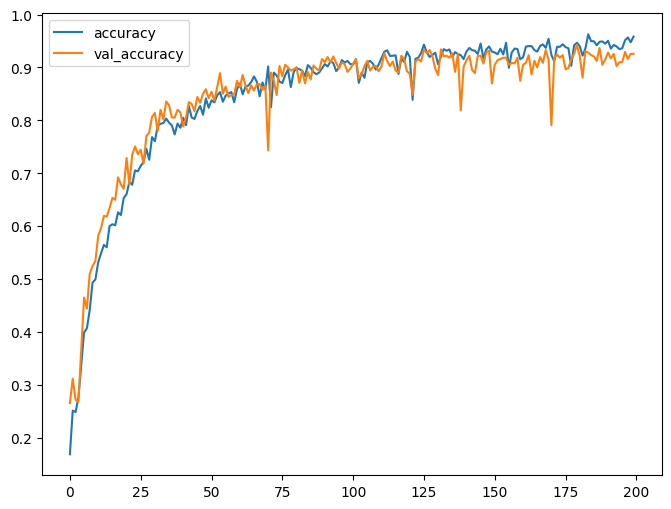

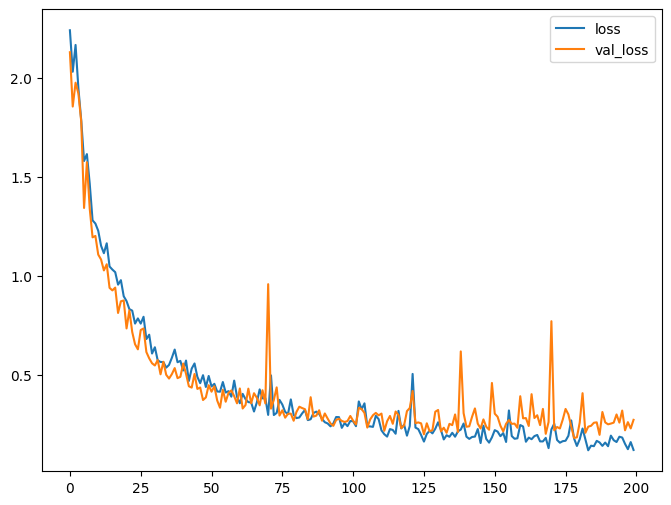

In [32]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

## Confusion matrix

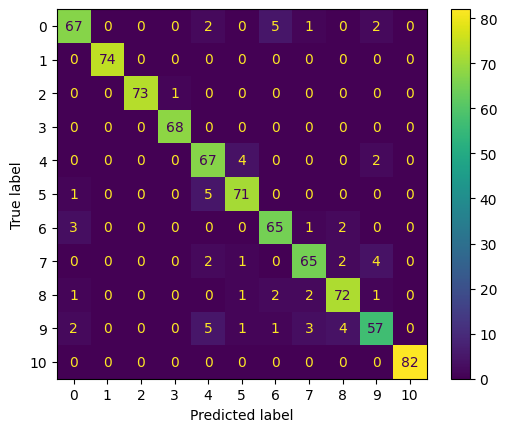

In [33]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 2

In [34]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'2xUSB': 0, 'piny': 1, 'wiatrak': 2, 'wykladzina': 3, 'cewka': 4, 'Auxxx': 5, 'usb': 6, 'plytka': 7, 'zlacze': 8, 'wyswietlacz': 9, 'wentylator': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


In [35]:
K.clear_session() 
classNumber = len(trainY_cat[0])
model = Sequential()
model.add(Conv2D(8,kernel_size=(11,11),input_shape=(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(9,9),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(7,7),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())         
model.add(Dense(256,activation='relu'))         
model.add(Dense(256,activation='relu'))
model.add(Dense(classNumber,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [36]:
test = 2
folderPath = os.path.join(parentDir, model_name +str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 13s 124ms/step - loss: 2.2246 - accuracy: 0.1797 - val_loss: 2.0602 - val_accuracy: 0.2409
Epoch 2/200
100/100 [==============================] - 12s 121ms/step - loss: 2.1052 - accuracy: 0.2364 - val_loss: 2.0593 - val_accuracy: 0.2506
Epoch 3/200
100/100 [==============================] - 12s 122ms/step - loss: 2.0114 - accuracy: 0.2598 - val_loss: 2.0121 - val_accuracy: 0.2628
Epoch 4/200
100/100 [==============================] - 12s 121ms/step - loss: 2.0396 - accuracy: 0.2513 - val_loss: 1.9742 - val_accuracy: 0.2494
Epoch 5/200
100/100 [==============================] - 12s 121ms/step - loss: 1.8124 - accuracy: 0.3358 - val_loss: 1.6936 - val_accuracy: 0.3881
Epoch 6/200
100/100 [==============================] - 12s 121ms/step - loss: 1.7137 - accuracy: 0.3714 - val_loss: 1.6400 - val_accuracy: 0.4100
Epoch 7/200
100/100 [==============================] - 12s 121ms/step - loss: 1.6624 - accuracy: 0.4020 - val_loss: 1.5222 -

Epoch 57/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2298 - accuracy: 0.9199 - val_loss: 0.2751 - val_accuracy: 0.9148
Epoch 58/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2749 - accuracy: 0.9067 - val_loss: 0.2333 - val_accuracy: 0.9282
Epoch 59/200
100/100 [==============================] - 12s 121ms/step - loss: 0.3029 - accuracy: 0.8938 - val_loss: 0.3155 - val_accuracy: 0.9039
Epoch 60/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2356 - accuracy: 0.9139 - val_loss: 0.2961 - val_accuracy: 0.9027
Epoch 61/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2067 - accuracy: 0.9256 - val_loss: 0.2479 - val_accuracy: 0.9258
Epoch 62/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2108 - accuracy: 0.9269 - val_loss: 0.2431 - val_accuracy: 0.9173
Epoch 63/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2238 - accuracy: 0.9187 - val_loss: 0

100/100 [==============================] - 12s 121ms/step - loss: 0.1522 - accuracy: 0.9521 - val_loss: 0.1364 - val_accuracy: 0.9574
Epoch 168/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1086 - accuracy: 0.9666 - val_loss: 0.1976 - val_accuracy: 0.9380
Epoch 169/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1652 - accuracy: 0.9439 - val_loss: 0.1395 - val_accuracy: 0.9562
Epoch 170/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1200 - accuracy: 0.9568 - val_loss: 0.1274 - val_accuracy: 0.9574
Epoch 171/200
100/100 [==============================] - 12s 122ms/step - loss: 0.0990 - accuracy: 0.9719 - val_loss: 0.1581 - val_accuracy: 0.9465
Epoch 172/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1237 - accuracy: 0.9619 - val_loss: 0.1524 - val_accuracy: 0.9574
Epoch 173/200
100/100 [==============================] - 12s 121ms/step - loss: 0.0910 - accuracy: 0.9701 - val_loss: 0.1801 -

In [37]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 0s 10ms/step - loss: 0.1203 - accuracy: 0.9659
Accuracy in test set: 0.9659
Execution time: 1.3846752643585205


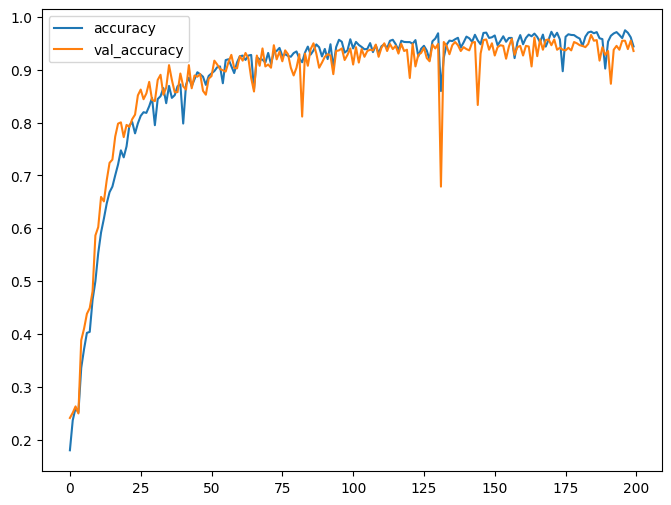

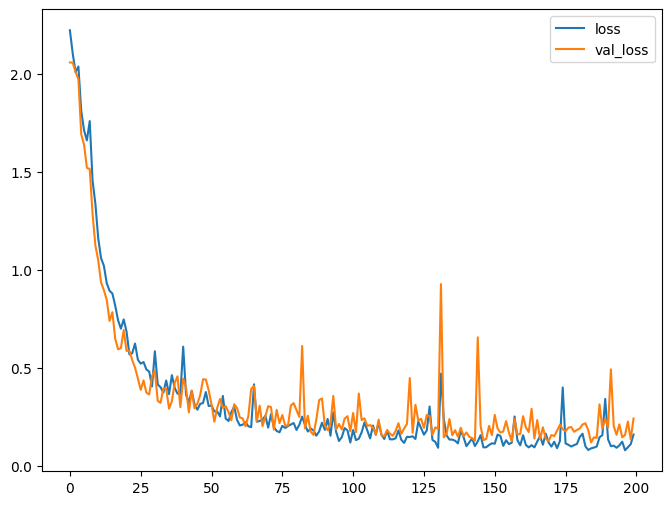

In [38]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

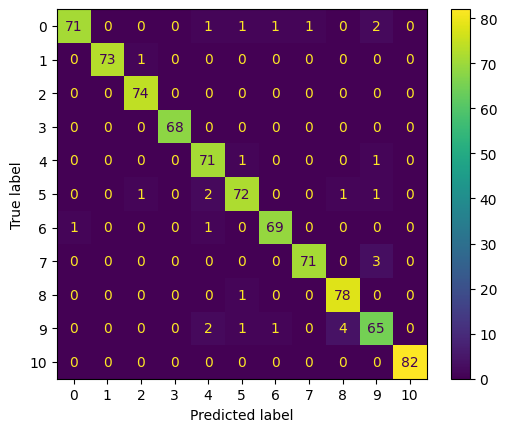

In [39]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 3

In [40]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'2xUSB': 0, 'piny': 1, 'wiatrak': 2, 'wykladzina': 3, 'cewka': 4, 'Auxxx': 5, 'usb': 6, 'plytka': 7, 'zlacze': 8, 'wyswietlacz': 9, 'wentylator': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


In [41]:
K.clear_session() 
classNumber = len(trainY_cat[0])
model = Sequential()
model.add(Conv2D(8,kernel_size=(11,11),input_shape=(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(9,9),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(7,7),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())         
model.add(Dense(256,activation='relu'))         
model.add(Dense(256,activation='relu'))
model.add(Dense(classNumber,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [42]:
test = 3
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 13s 124ms/step - loss: 2.2368 - accuracy: 0.1605 - val_loss: 2.1273 - val_accuracy: 0.1922
Epoch 2/200
100/100 [==============================] - 12s 121ms/step - loss: 2.0443 - accuracy: 0.2361 - val_loss: 1.9409 - val_accuracy: 0.2993
Epoch 3/200
100/100 [==============================] - 12s 122ms/step - loss: 1.9056 - accuracy: 0.2985 - val_loss: 1.7623 - val_accuracy: 0.3564
Epoch 4/200
100/100 [==============================] - 12s 123ms/step - loss: 1.7894 - accuracy: 0.3373 - val_loss: 1.7018 - val_accuracy: 0.3674
Epoch 5/200
100/100 [==============================] - 12s 122ms/step - loss: 1.7365 - accuracy: 0.3556 - val_loss: 1.6275 - val_accuracy: 0.3954
Epoch 6/200
100/100 [==============================] - 12s 122ms/step - loss: 1.6118 - accuracy: 0.4152 - val_loss: 1.4758 - val_accuracy: 0.4635
Epoch 7/200
100/100 [==============================] - 12s 122ms/step - loss: 1.4558 - accuracy: 0.4688 - val_loss: 1.3680 -

Epoch 57/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2488 - accuracy: 0.9133 - val_loss: 0.2385 - val_accuracy: 0.9161
Epoch 58/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2276 - accuracy: 0.9161 - val_loss: 0.3089 - val_accuracy: 0.8917
Epoch 59/200
100/100 [==============================] - 12s 121ms/step - loss: 0.3285 - accuracy: 0.8871 - val_loss: 0.2517 - val_accuracy: 0.9148
Epoch 60/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2516 - accuracy: 0.9098 - val_loss: 0.2933 - val_accuracy: 0.9015
Epoch 61/200
100/100 [==============================] - 12s 121ms/step - loss: 0.2604 - accuracy: 0.9026 - val_loss: 0.3165 - val_accuracy: 0.9002
Epoch 62/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2261 - accuracy: 0.9193 - val_loss: 0.2501 - val_accuracy: 0.9148
Epoch 63/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2302 - accuracy: 0.9168 - val_loss: 0

100/100 [==============================] - 12s 122ms/step - loss: 0.1057 - accuracy: 0.9650 - val_loss: 0.2053 - val_accuracy: 0.9489
Epoch 168/200
100/100 [==============================] - 12s 121ms/step - loss: 0.0866 - accuracy: 0.9694 - val_loss: 0.2392 - val_accuracy: 0.9538
Epoch 169/200
100/100 [==============================] - 12s 122ms/step - loss: 0.1989 - accuracy: 0.9392 - val_loss: 0.1748 - val_accuracy: 0.9513
Epoch 170/200
100/100 [==============================] - 12s 122ms/step - loss: 0.1035 - accuracy: 0.9628 - val_loss: 0.2436 - val_accuracy: 0.9319
Epoch 171/200
100/100 [==============================] - 12s 122ms/step - loss: 0.2023 - accuracy: 0.9351 - val_loss: 0.1894 - val_accuracy: 0.9550
Epoch 172/200
100/100 [==============================] - 12s 122ms/step - loss: 0.1028 - accuracy: 0.9603 - val_loss: 0.1943 - val_accuracy: 0.9599
Epoch 173/200
100/100 [==============================] - 12s 121ms/step - loss: 0.1264 - accuracy: 0.9574 - val_loss: 0.1514 -

In [43]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 0s 10ms/step - loss: 0.1391 - accuracy: 0.9599
Accuracy in test set: 0.9599
Execution time: 1.5195503234863281


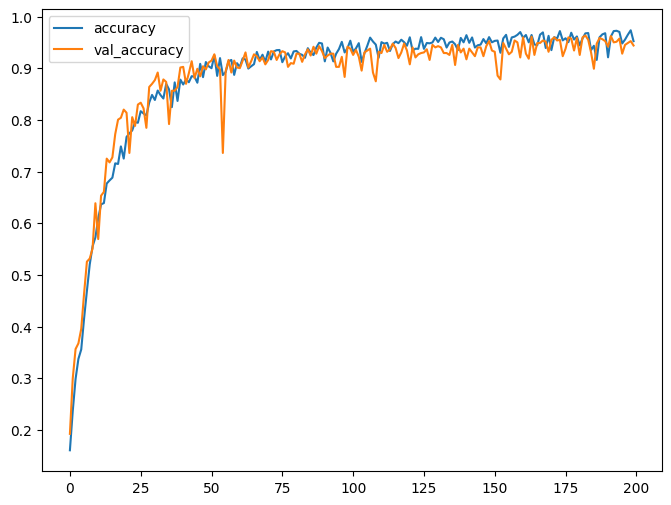

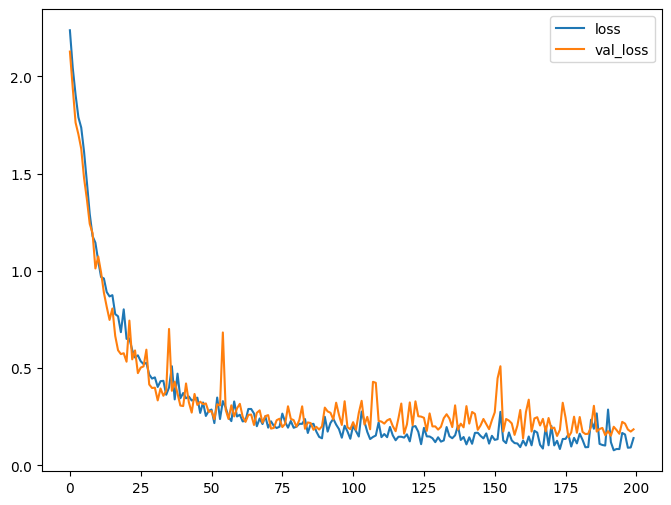

In [44]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

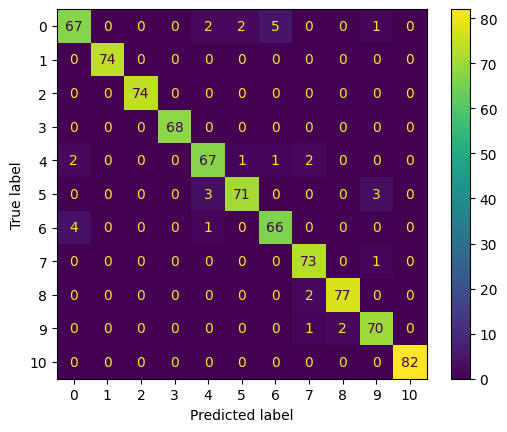

In [45]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)